# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.pa-100k

In [ ]:
from zipfile import ZipFile

file = '/content/drive/MyDrive/PA-100K/annotation.zip'

with ZipFile(file, 'r') as zip:
  zip.printdir()

  print('extracting annotations...')
  zip.extractall(path='/content/pa-100k/') #colocar pasta zipada no drive
  print('Done!')

File Name                                             Modified             Size
annotation.mat                                 2017-07-26 13:11:32       579061
README.txt                                     2017-07-26 13:35:52          638
extracting annotations...
Done!


In [ ]:
import scipy.io
import pandas as pd
import numpy as np

mat_data = scipy.io.loadmat('/content/pa-100k/annotation.mat')

# Extract data from the loaded MATLAB file
train_images_name = mat_data['train_images_name']
val_images_name = mat_data['val_images_name']
test_images_name = mat_data['test_images_name']

train_label = mat_data['train_label']
val_label = mat_data['val_label']
test_label = mat_data['test_label']

attributes = mat_data['attributes']

# Convert ndarray attribute names to strings
attribute_names = [name.item() for name in attributes.flatten()]

# Convert the data to a DataFrame with string column labels
train_df = pd.DataFrame(data=train_label, columns=attribute_names)
val_df = pd.DataFrame(data=val_label, columns=attribute_names)
test_df = pd.DataFrame(data=test_label, columns=attribute_names)

# Save DataFrames to CSV files
train_df.to_csv('/content/pa-100k/train_data.csv', index=False)
val_df.to_csv('/content/pa-100k/val_data.csv', index=False)
test_df.to_csv('/content/pa-100k/test_data.csv', index=False)

In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Female              10000 non-null  uint8
 1   AgeOver60           10000 non-null  uint8
 2   Age18-60            10000 non-null  uint8
 3   AgeLess18           10000 non-null  uint8
 4   Front               10000 non-null  uint8
 5   Side                10000 non-null  uint8
 6   Back                10000 non-null  uint8
 7   Hat                 10000 non-null  uint8
 8   Glasses             10000 non-null  uint8
 9   HandBag             10000 non-null  uint8
 10  ShoulderBag         10000 non-null  uint8
 11  Backpack            10000 non-null  uint8
 12  HoldObjectsInFront  10000 non-null  uint8
 13  ShortSleeve         10000 non-null  uint8
 14  LongSleeve          10000 non-null  uint8
 15  UpperStride         10000 non-null  uint8
 16  UpperLogo           10000 non-null  uint8

In [ ]:
data_file = '/content/drive/MyDrive/PA-100K/data.zip'

with ZipFile(data_file, 'r') as zip:
  zip.printdir()

  print('extracting data...')
  zip.extractall(path='/content/pa-100k/')
  print('Done!')

A saída de streaming foi truncada nas últimas 5000 linhas.
release_data/release_data/095003.jpg           2017-07-26 10:09:16         5480
release_data/release_data/095004.jpg           2017-07-26 10:10:40         3735
release_data/release_data/095005.jpg           2017-07-26 10:17:16         3292
release_data/release_data/095006.jpg           2017-07-26 10:15:04         2246
release_data/release_data/095007.jpg           2017-07-26 10:06:28         6155
release_data/release_data/095008.jpg           2017-07-26 10:34:56         3453
release_data/release_data/095009.jpg           2017-07-26 10:29:08         4931
release_data/release_data/095010.jpg           2017-07-26 10:19:44         4246
release_data/release_data/095011.jpg           2017-07-26 10:34:24         3286
release_data/release_data/095012.jpg           2017-07-26 10:20:58         5741
release_data/release_data/095013.jpg           2017-07-26 10:34:52         3637
release_data/release_data/095014.jpg           2017-07-26 10:

In [ ]:
image_names = [f'{i + 1:06d}.jpg' for i in range(len(test_df)+len(train_df)+len(val_df))]
image_names[0:10]

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg']

In [ ]:
image_names_train = [f'{i + 1:06d}.jpg' for i in range(len(train_df))]
image_names_val = [f'{i + 1 + len(train_images_name):06d}.jpg' for i in range(len(val_df))]
image_names_test = [f'{i + 1 + len(train_images_name) + len(val_images_name):06d}.jpg' for i in range(len(test_df))]

In [ ]:
train_df['filename']= image_names_train
val_df['filename'] = image_names_val
test_df['filename'] = image_names_test

In [ ]:
train_df.set_index('filename',inplace=True)
val_df.set_index('filename',inplace=True)
test_df.set_index('filename',inplace=True)

In [ ]:
val_df.head()

,Female,AgeOver60,Age18-60,AgeLess18,Front,Side,Back,Hat,Glasses,HandBag,...,UpperLogo,UpperPlaid,UpperSplice,LowerStripe,LowerPattern,LongCoat,Trousers,Shorts,Skirt&Dress,boots
filename,,,,,,,,,,,,,,,,,,,,,
080001.jpg,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
080002.jpg,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
080003.jpg,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
080004.jpg,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
080005.jpg,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
val_df.to_csv("validation_dataframe.csv")

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
features = ['Female','Front','Back', 'Side','Trousers','Shorts', 'Skirt&Dress']
data_path = '/content/pa-100k/release_data/release_data/'

In [ ]:
val_df.index[0]

'080001.jpg'

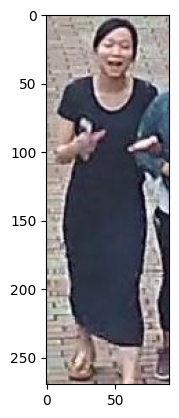

,080001.jpg
Female,1
Front,1
Back,0
Side,0
Trousers,0
Shorts,0
Skirt&Dress,1


In [ ]:
picture = data_path + val_df.index[0]#'000001.jpg'
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()
val_df.loc[picture.split('/')[-1]][features]

# Dataset Violencia

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# XAI

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 28.9 MB/s eta 0:00:00


In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.17.0


In [ ]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.6 MB/s eta 0:00:00


In [ ]:
import os
import cv2

In [ ]:
import shap

In [ ]:
import tensorflow as tf

In [ ]:
def get_images_and_labels(image_folder, dataframe):

  image_tuples = []

  # Loop through each file in the dataframe index
  for file_name in dataframe.index:
      # Construct the full path to the image file
      image_path = os.path.join(image_folder, file_name)

      # Check if the image file exists
      if os.path.exists(image_path):
          # Get the row of data corresponding to the file_name
          row_data = dataframe.loc[file_name].values

          img = cv2.imread(image_path, cv2.IMREAD_COLOR)

          # Append the image path and row data as a tuple
          image_tuples.append((img, row_data))

  return image_tuples

In [ ]:
os.path.join("pa-100k/release_data/release_data/", "80000.jpg")

'pa-100k/release_data/release_data/80000.jpg'

In [ ]:
lista = get_images_and_labels("pa-100k/release_data/release_data/", val_df)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
x,y = [[i for i, j in lista],[j for i, j in lista]]

In [ ]:
y

[array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0], dtype=uint8),
 array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0], dtype=uint8),
 array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0], dtype=uint8),
 array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0], dtype=uint8),
 array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0], dtype=uint8),
 array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0], dtype=uint8),
 array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0], dtype=uint8),
 array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0], dtype=uint8),
 array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0], dtype=uint8),
 array([0, 0, 1, 0,

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input

In [ ]:
gender_model_path = '/content/drive/MyDrive/ModelWeights/Gender/mobilenet_model.keras'

model_mobilenet = tf.keras.saving.load_model(gender_model_path)

In [ ]:
def f(X):
  tmp = X.copy()
  tmp = tf.cast(tmp, tf.float32)
  tmp = tf.expand_dims(tmp, 0)
  tmp = preprocess_input(tmp)
  return model_mobilenet.predict(tmp)

In [ ]:
def fu(x):
    tmp = x.copy()
    #print(f"ROGINELDO: {tmp.shape}")
    tmp = tf.expand_dims(tmp, 0)
    #tmp = preprocess_input(tmp)
    return model_mobilenet(tmp)

In [ ]:
def resize(img):
  return cv2.resize(img, (80,120))#tf.image.resize(img, (120,80), tf.image.ResizeMethod.NEAREST_NEIGHBOR)

In [ ]:
x_resized = list(map(resize, x))

In [ ]:
def predict(X):
  tmp = X.copy()
  tmp = tf.cast(tmp, tf.float32)
  tmp = tf.expand_dims(tmp, 0)
  tmp = preprocess_input(tmp)
  return model_mobilenet.predict(tmp)

2/2 [==============================] - 1s 226ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step


PartitionExplainer explainer: 2it [01:43, 103.65s/it]              


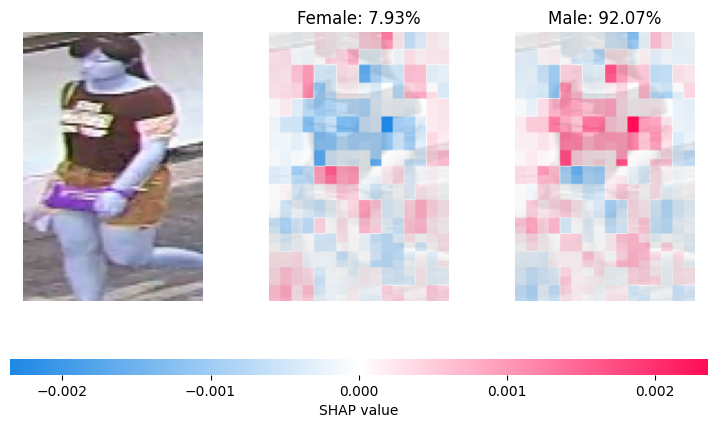

In [ ]:
def f(img):
    tmp = img.copy()
    #tmp = tf.expand_dims(tmp, 0)
    tmp = tf.cast(tmp, tf.float32)
    tmp = preprocess_input(tmp)
    return model_mobilenet.predict(tmp)


masker_blur = shap.maskers.Image("inpaint_telea", x_resized[5043].shape)
explainer = shap.Explainer(f, masker_blur, output_names=["Female", "Male"])

img_index = 5043
pred = f(np.expand_dims(x_resized[img_index], axis=0))
labels_predictions = [f"Female: {pred[0][0]*100:.2f}%", f"Male: {pred[0][1]*100:.2f}%"]

shap_values_ = explainer(np.expand_dims(x_resized[img_index], axis=0), max_evals=5000, batch_size=50)
shap.image_plot(shap_values_, labels=labels_predictions)

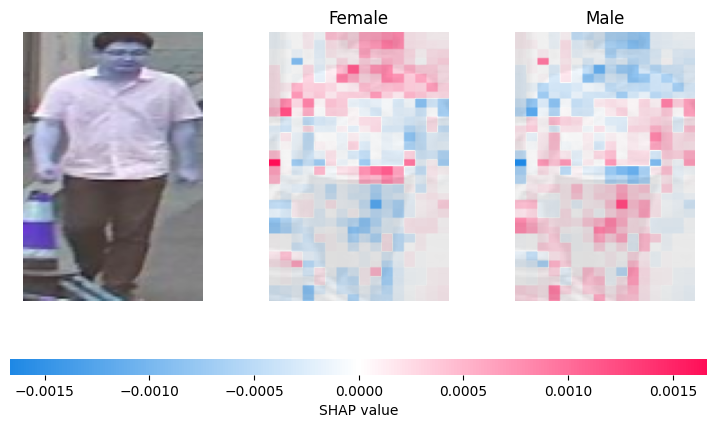

In [ ]:
shap.image_plot(shap_values_)

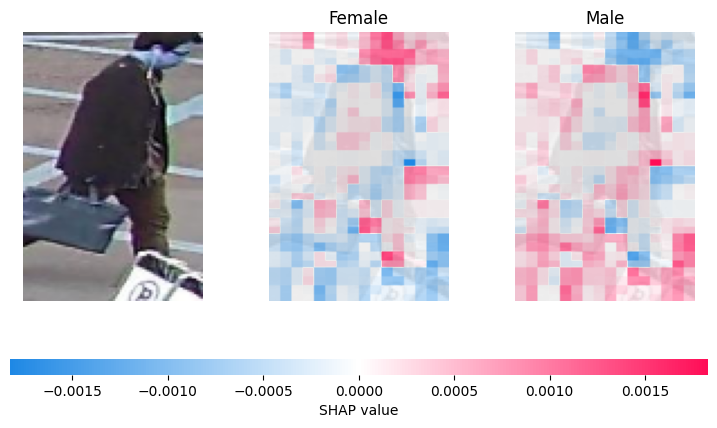

In [ ]:
shap.image_plot(shap_values_)

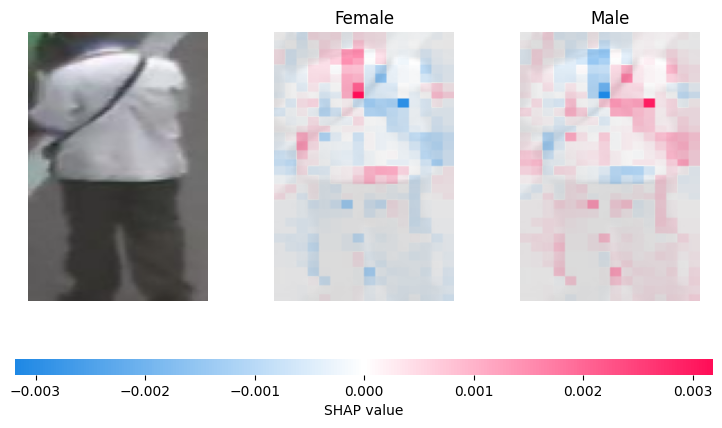

In [ ]:
shap.image_plot(shap_values_)

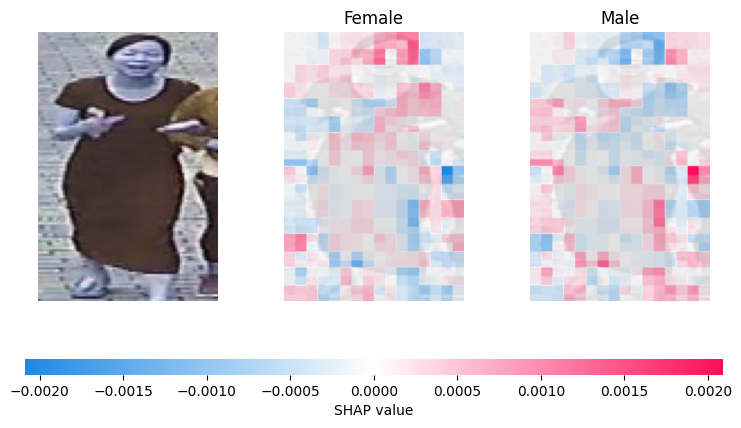

In [ ]:
shap.image_plot(shap_values_)

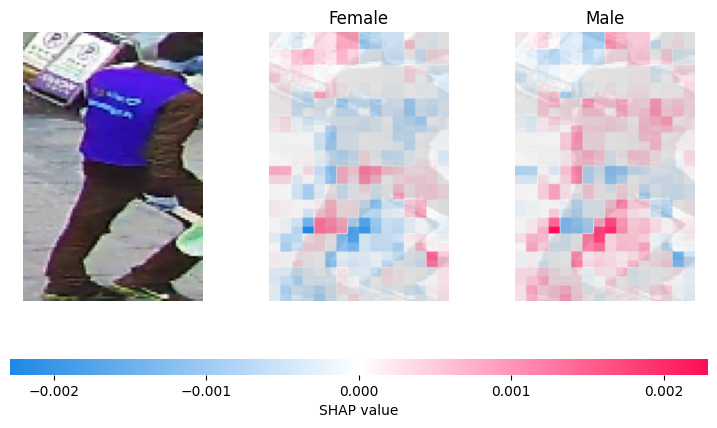

In [ ]:
shap.image_plot(shap_values_)

#shap.image_plot(shap_values, X[1:3]/255)

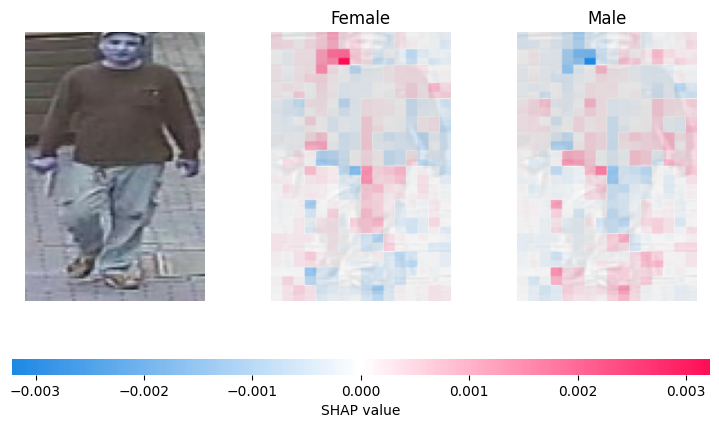

In [ ]:
shap.image_plot(shap_values_)

# Grad-CAM

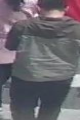

In [ ]:
cv2_imshow(x_resized[2600])

35


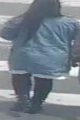

36


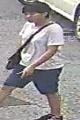

37


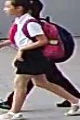

38


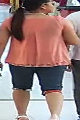

39


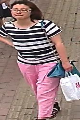

40


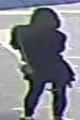

41


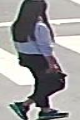

42


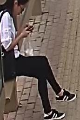

43


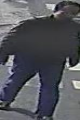

44


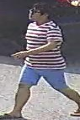

45


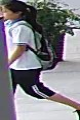

46


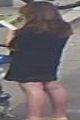

47


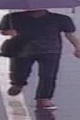

48


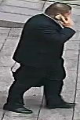

49


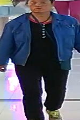

50


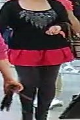

51


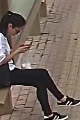

52


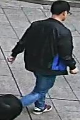

53


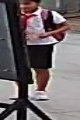

54


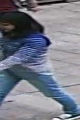

55


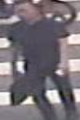

56


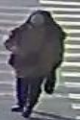

57


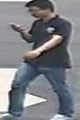

58


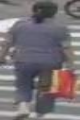

59


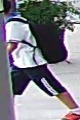

60


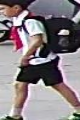

61


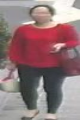

62


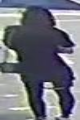

63


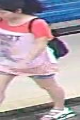

64


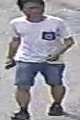

65


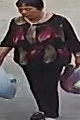

66


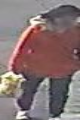

67


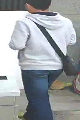

68


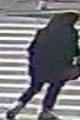

69


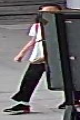

70


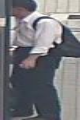

71


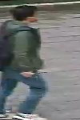

72


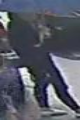

73


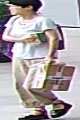

74


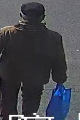

75


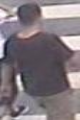

76


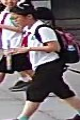

77


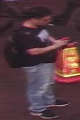

78


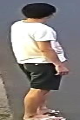

79


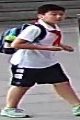

80


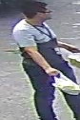

81


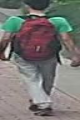

82


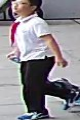

83


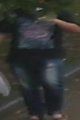

84


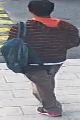

85


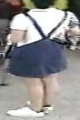

86


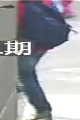

87


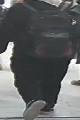

88


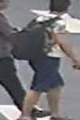

89


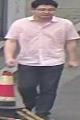

In [ ]:
for i in range(35,90):
  print(i)
  cv2_imshow(x_resized[i])

In [ ]:
#IMAGE_PATH = './cat.jpg'
LAYER_NAME = 'Conv_1'
CLASS_INDEX = 1

#img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224, 224))
#img = tf.keras.preprocessing.image.img_to_array(img)
base_image = x_resized[89].copy()
img = preprocess_input(base_image)

#model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)

grad_model = tf.keras.models.Model([model_mobilenet.inputs], [model_mobilenet.get_layer(LAYER_NAME).output, model_mobilenet.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(np.array([img]))
    loss = predictions[:, CLASS_INDEX]

output = conv_outputs[0]
grads = tape.gradient(loss, conv_outputs)[0]

gate_f = tf.cast(output > 0, 'float32')
gate_r = tf.cast(grads > 0, 'float32')
guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

weights = tf.reduce_mean(guided_grads, axis=(0, 1))

cam = np.ones(output.shape[0: 2], dtype = np.float32)

for i, w in enumerate(weights):
    cam += w * output[:, :, i]

cam = cv2.resize(cam.numpy(), (224, 224))
cam = np.maximum(cam, 0)
heatmap = (cam - cam.min()) / (cam.max() - cam.min())

cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

output_image = cv2.addWeighted(base_image, 1 - 0.5,resize(cam), 0.5, 0)

cv2.imwrite('gradcam_89.png', output_image)

True

# LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=39b5498beacaf45f4f8d59cfcbe958000a47b2ff68668ecbf06e35410a05f9f6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import random
import pandas as pd
import numpy as np
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 95ms/step


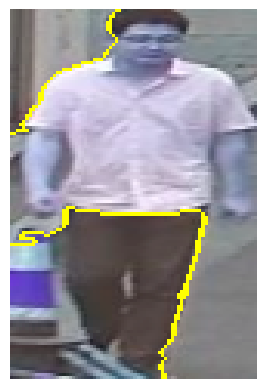

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(x_resized[89], model_mobilenet.predict,top_labels=2)

image, mask = explanation.get_image_and_mask(0)
plt.imshow(mark_boundaries(image,mask))
plt.axis('off')
plt.show()

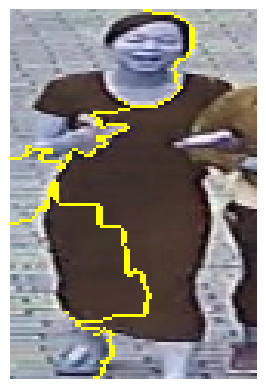

In [ ]:
plt.imshow(mark_boundaries(image,mask))
plt.axis('off')
plt.show()

# Resultados DF

In [ ]:
val_df

,Female,AgeOver60,Age18-60,AgeLess18,Front,Side,Back,Hat,Glasses,HandBag,...,UpperLogo,UpperPlaid,UpperSplice,LowerStripe,LowerPattern,LongCoat,Trousers,Shorts,Skirt&Dress,boots
filename,,,,,,,,,,,,,,,,,,,,,
080001.jpg,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
080002.jpg,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
080003.jpg,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
080004.jpg,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
080005.jpg,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
089996.jpg,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
089997.jpg,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
089998.jpg,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
val_df.columns

Index(['Female', 'AgeOver60', 'Age18-60', 'AgeLess18', 'Front', 'Side', 'Back',
       'Hat', 'Glasses', 'HandBag', 'ShoulderBag', 'Backpack',
       'HoldObjectsInFront', 'ShortSleeve', 'LongSleeve', 'UpperStride',
       'UpperLogo', 'UpperPlaid', 'UpperSplice', 'LowerStripe', 'LowerPattern',
       'LongCoat', 'Trousers', 'Shorts', 'Skirt&Dress', 'boots'],
      dtype='object')

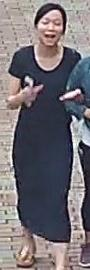

In [ ]:
teste = cv2.imread("./pa-100k/release_data/release_data/080001.jpg")
cv2_imshow(teste)

In [ ]:
filenames_list = np.array(val_df.index)

In [ ]:
filenames_list

array(['080001.jpg', '080002.jpg', '080003.jpg', ..., '089998.jpg',
       '089999.jpg', '090000.jpg'], dtype=object)

In [ ]:
explainer_gradient = shap.GradientExplainer(model_mobilenet, x_resized[0])

# we explain the model's predictions on the first three samples of the test set
#shap_values_gradient = explainer_gradient.shap_values(x_resized[0])